In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

# Missing data


In [4]:
missing_data_dict = {
    'Pipecolic acid': {'N carbons':6,'Mol weight [g/mol]':129.16},
    'Creatine': {'N carbons':4,'Mol weight [g/mol]':131.13},
    'Alpha-aminoadipate': {'N carbons':6,'Mol weight [g/mol]':161.16},
    'Cis-aconitate': {'N carbons':6,'Mol weight [g/mol]':174.11},
    'Glutarate': {'N carbons':5,'Mol weight [g/mol]':132.11},
    'Alpha-aminobutyrate': {'N carbons':4,'Mol weight [g/mol]':102.11}
}

# Load data

In [5]:
sintef_fn = 'sintef_2023/sintef_2023_rates.csv'
paczia_ecoli_fn = 'paczia_et_al_2013/paczia_13_rates_ecoli.csv'
paczia_cglutamicum_fn = 'paczia_et_al_2013/paczia_13_rates_cglutamicum.csv'
paczia_yeast_fn = 'paczia_et_al_2013/paczia_13_rates_yeast.csv'
paczia_blicheniformis_fn = 'paczia_et_al_2013/paczia_13_rates_blicheniformis.csv'

In [6]:
sintef_df = pd.read_csv(sintef_fn, index_col=0)
paczia_df_ecoli = pd.read_csv(paczia_ecoli_fn, index_col = 0)
paczia_df_cglut = pd.read_csv(paczia_cglutamicum_fn, index_col = 0)
paczia_df_yeast = pd.read_csv(paczia_yeast_fn, index_col = 0)
paczia_df_blich = pd.read_csv(paczia_blicheniformis_fn, index_col = 0)

In [7]:
df = pd.concat([sintef_df, paczia_df_ecoli, paczia_df_cglut, paczia_df_blich,
          paczia_df_yeast])
df['Metabolite'] = df['Metabolite'].str.capitalize()

In [8]:
df.columns

Index(['M', 'Metabolite', 'Carbon source', 'Rate [mmol/gDW/h]', 'Rate var',
       'Metabolite value [gDW/mmol]', 'N carbons', 'Mol weight [g/mol]',
       'Turnover [mmol/gDW/h]', 'BiGG ID', 'Species', 'Dataset', 'Yeast ID',
       'Model metabolite name'],
      dtype='object')

In [9]:
df['Metabolite'].replace('Nad', 'NAD', inplace=True)
df['Metabolite'].replace('Tryptophane', 'Tryptophan', inplace=True)
df['Metabolite'].replace('L-serine', 'Serine', inplace=True)
df['Metabolite'].replace('Hexoses including glucose and fructose', 'Hexoses', inplace=True)
df.reset_index(inplace=True, drop=True)

In [10]:
idx =df['Metabolite'] == 'Leucine/isoleucine'
df.loc[328,'Metabolite'] = 'Leucine'
df.loc[329,'Metabolite'] = 'Isoleucine'
df.loc[365, 'Metabolite'] = 'Leucine'
df.loc[366, 'Metabolite'] = 'Isoleucine'

In [11]:
idx =df['Metabolite'] == '2/3-phosphoglycerate'
df.loc[idx&(df['BiGG ID']=='2pg'), 'Metabolite'] = '2-phosphoglycerate'
df.loc[idx&(df['BiGG ID']=='3pg'), 'Metabolite'] = '3-phosphoglycerate'
df.loc[345, 'Metabolite'] = '2-phosphoglycerate'
df.loc[346, 'Metabolite'] = '3-phosphoglycerate'
df.loc[366, 'Metabolite'] = '3-phosphoglycerate'

In [12]:
idx = df['Metabolite'] == 'Ribu-/xylulose-5-phosphate'
df.loc[idx&(df['BiGG ID']=='ru5p__D'), 'Metabolite'] = 'Ribulose-5-phosphate'
df.loc[idx&(df['BiGG ID']!='ru5p__D'), 'Metabolite'] = 'Xylulose-5-phosphate'
df.loc[348, 'Metabolite'] = 'Ribulose-5-phosphate'
df.loc[349, 'Metabolite'] = 'Xylulose-5-phosphate'

In [13]:
mets = df.Metabolite.str.capitalize().unique()
mets.sort()


# Load additional info

In [14]:
met_info = pd.read_csv('../data/met_info_3.csv')

In [15]:
met_info.rename(columns={'Topological Polar Surface Area []': 'Topological Polar Surface Area'}, inplace=True)

In [16]:
df = df.merge(met_info, left_on='Metabolite', right_on='Metabolite')

In [17]:
df.columns

Index(['M', 'Metabolite', 'Carbon source', 'Rate [mmol/gDW/h]', 'Rate var',
       'Metabolite value [gDW/mmol]', 'N carbons', 'Mol weight [g/mol]',
       'Turnover [mmol/gDW/h]', 'BiGG ID', 'Species', 'Dataset', 'Yeast ID',
       'Model metabolite name', 'Mass', 'Metabolite id', 'Charge', 'Phosphate',
       'Topological Polar Surface Area', 'Intracellular concentration [M]',
       'log P', 'Compound class', 'Ref'],
      dtype='object')

## Add missing values

In [18]:
for key, mdic in missing_data_dict.items():
    idx = df.Metabolite == key
    df.loc[idx, 'N carbons'] = mdic['N carbons']
    df.loc[idx, 'Mol weight [g/mol]'] = mdic['Mol weight [g/mol]']


In [19]:
df.isna().sum()

M                                  146
Metabolite                           0
Carbon source                        0
Rate [mmol/gDW/h]                   10
Rate var                           146
Metabolite value [gDW/mmol]         43
N carbons                            0
Mol weight [g/mol]                   0
Turnover [mmol/gDW/h]               42
BiGG ID                             79
Species                              0
Dataset                              0
Yeast ID                           341
Model metabolite name              341
Mass                                 0
Metabolite id                       64
Charge                               4
Phosphate                            4
Topological Polar Surface Area       4
Intracellular concentration [M]     92
log P                                4
Compound class                       0
Ref                                 92
dtype: int64

## Calculate log-transformed values

In [20]:
df['log10(Rate [mmol/gDW/h])'] = np.log10(df['Rate [mmol/gDW/h]'])
df['log10(Metabolite value [gDW/mmol])'] = np.log10(df['Metabolite value [gDW/mmol]'])

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
df['Rate [mmol C/gDW/h]'] = df['Rate [mmol/gDW/h]']*df['N carbons']
df['Rate [g/gDW/h]'] = df['Rate [mmol/gDW/h]']*df['Mol weight [g/mol]']*1e-3

df['Metabolite value [gDW/mmol C]'] = df['Metabolite value [gDW/mmol]']/df['N carbons']
df['Metabolite value [gDW/g]'] = df['Metabolite value [gDW/mmol]']*1e3/df['Mol weight [g/mol]']


In [22]:
cols = ['Rate [mmol C/gDW/h]', 'Rate [g/gDW/h]', 'Metabolite value [gDW/mmol C]', 'Metabolite value [gDW/g]', 'Turnover [mmol/gDW/h]']
for col in cols:
    logcol = f'log10({col})'
    df[logcol] = np.log10(df[col])

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
df['Species - Carbon source'] = df['Species'] + ' - ' + df['Carbon source']

In [24]:
df.columns

Index(['M', 'Metabolite', 'Carbon source', 'Rate [mmol/gDW/h]', 'Rate var',
       'Metabolite value [gDW/mmol]', 'N carbons', 'Mol weight [g/mol]',
       'Turnover [mmol/gDW/h]', 'BiGG ID', 'Species', 'Dataset', 'Yeast ID',
       'Model metabolite name', 'Mass', 'Metabolite id', 'Charge', 'Phosphate',
       'Topological Polar Surface Area', 'Intracellular concentration [M]',
       'log P', 'Compound class', 'Ref', 'log10(Rate [mmol/gDW/h])',
       'log10(Metabolite value [gDW/mmol])', 'Rate [mmol C/gDW/h]',
       'Rate [g/gDW/h]', 'Metabolite value [gDW/mmol C]',
       'Metabolite value [gDW/g]', 'log10(Rate [mmol C/gDW/h])',
       'log10(Rate [g/gDW/h])', 'log10(Metabolite value [gDW/mmol C])',
       'log10(Metabolite value [gDW/g])', 'log10(Turnover [mmol/gDW/h])',
       'Species - Carbon source'],
      dtype='object')

In [25]:
df.to_csv('rates_and_values.csv')

# Plot!

In [26]:
df.sort_values(['Species', 'Metabolite'])

M            Metabolite Carbon source  Rate [mmol/gDW/h]  Rate var  \
317  NaN    2-phosphoglycerate       Glucose           0.001163       NaN   
321  NaN    3-phosphoglycerate       Glucose           0.001163       NaN   
372  NaN               Acetate       Glucose           2.466166       NaN   
103  NaN               Alanine       Glucose           0.048922       NaN   
369  NaN   Alpha-ketoglutarate       Glucose           0.012543       NaN   
..   ...                   ...           ...                ...       ...   
200  NaN             Succinate       Glucose           0.001400       NaN   
260  NaN              Tyrosine       Glucose           0.000005       NaN   
367  NaN                Uracil       Glucose           0.001766       NaN   
76   NaN                Valine       Glucose           0.000038       NaN   
340  NaN  Xylulose-5-phosphate       Glucose                NaN       NaN   

     Metabolite value [gDW/mmol]  N carbons  Mol weight [g/mol]  \
317                     0.034358        3.0          184.041361   
321                     0.034358        3.0          184.041361   
372                     0.023425        2.0           59.044020   
103                     0.039315        3.0           89.093180   
369                     0.053729        5.0          144.082260   
..                           ...        ...                 ...   
200                     0.050576        4.0          116.072160   
260                     0.153178        9.0          181.188540   
367                     0.061857        4.0          112.086760   
76                      0.086412        5.0          117.146340   
340                     0.079479        5.0          228.093921   

     Turnover [mmol/gDW/h] BiGG ID  ... Rate [mmol C/gDW/h] Rate [g/gDW/h]  \
317               8.110630     2pg  ...            0.003490   2.141259e-04   
321               9.380940     3pg  ...            0.003490   2.141259e-04   
372               1.436057      ac  ...            4.932332   1.456123e-01   
103               2.430871  ala__L  ...            0.146766   4.358612e-03   
369               6.890829     akg  ...            0.062714   1.807207e-03   
..                     ...     ...  ...                 ...            ...   
200               0.062829     NaN  ...            0.005602   1.625483e-04   
260               0.044748     NaN  ...            0.000043   8.638589e-07   
367               0.000000     NaN  ...            0.007063   1.979081e-04   
76                0.116081     NaN  ...            0.000189   4.431818e-06   
340               0.059052     NaN  ...                 NaN            NaN   

    Metabolite value [gDW/mmol C] Metabolite value [gDW/g]  \
317                      0.011453                 0.186687   
321                      0.011453                 0.186687   
372                      0.011713                 0.396743   
103                      0.013105                 0.441280   
369                      0.010746                 0.372908   
..                            ...                      ...   
200                      0.012644                 0.435726   
260                      0.017020                 0.845408   
367                      0.015464                 0.551868   
76                       0.017282                 0.737641   
340                      0.015896                 0.348448   

     log10(Rate [mmol C/gDW/h]) log10(Rate [g/gDW/h])  \
317                   -2.457125             -3.669331   
321                   -2.457125             -3.669331   
372                    0.693052             -0.836802   
103                   -0.833375             -2.360652   
369                   -1.202633             -2.742992   
..                          ...                   ...   
200                   -2.251686             -3.789018   
260                   -4.367445             -6.063557   
367                   -2.151031             -3.703537   
76                    -3.

In [27]:
df.loc[df.Species=='E. coli',:].sort_values(['log10(Rate [mmol/gDW/h])', 'Metabolite'], ascending=False).head(30)

M           Metabolite Carbon source  Rate [mmol/gDW/h]      Rate var  \
371  NaN              Acetate       Glucose           1.304263           NaN   
166  NaN             Pyruvate       Glucose           0.491033           NaN   
163   M6             Pyruvate      L-malate           0.290876  1.455076e-04   
196   M7            Succinate      L-malate           0.251380  1.651722e-01   
282  M11  Alpha-aminobutyrate     L-alanine           0.205927  1.449920e-03   
281  M10  Alpha-aminobutyrate     L-alanine           0.201636  2.730044e-03   
280   M9  Alpha-aminobutyrate     L-alanine           0.171957  1.478877e-03   
164   M7             Pyruvate      L-malate           0.136063  3.258989e-03   
162   M5             Pyruvate      L-malate           0.120035  5.612836e-03   
359  NaN              Orotate       Glucose           0.098852           NaN   
283   M9              Glycine     L-alanine           0.048460  1.598842e-04   
284  M10              Glycine     L-alanine           0.039698  9.727897e-05   
193   M3            Succinate     Galactose           0.031035  3.523322e-05   
285  M11              Glycine     L-alanine           0.030233  4.395965e-05   
223   M5              Citrate      L-malate           0.016968           inf   
199  M11            Succinate     L-alanine           0.010570  7.037565e-06   
143  M10           Asparagine     L-alanine           0.010157  1.053499e-05   
53   M10  Gamma-aminobutyrate     L-alanine           0.009867  1.001078e-07   
229  NaN              Citrate       Glucose           0.007723           NaN   
52    M9  Gamma-aminobutyrate     L-alanine           0.007653  3.966387e-08   
181  M11              Hexoses     L-alanine           0.007640           inf   
54   M11  Gamma-aminobutyrate     L-alanine           0.007455  3.645529e-08   
142   M9           Asparagine     L-alanine           0.006835  1.601635e-05   
226   M9              Citrate     L-alanine           0.006538           inf   
191   M1            Succinate     Galactose           0.006382  3.668953e-06   
144  M11           Asparagine     L-alanine           0.005749  2.348170e-05   
153   M7            Aspartate      L-malate           0.005570  8.670989e-05   
207   M9               Malate     L-alanine           0.005566  3.020051e-06   
201   M1               Malate     Galactose           0.005498           inf   
152   M6            Aspartate      L-malate           0.005385  3.856865e-05   

     Metabolite value [gDW/mmol]  N carbons  Mol weight [g/mol]  \
371                     0.009873        2.0            59.04402   
166                     0.017532        3.0            87.05412   
163                     0.005981        3.0            87.05412   
196                     0.008195        4.0           116.07216   
282                          NaN        4.0           102.11000   
281                          NaN        4.0           102.11000   
280                          NaN        4.0           102.11000   
164                     0.005981        3.0            87.05412   
162                     0.005981        3.0            87.05412   
359                     0.034516        5.0           155.08832   
283                     0.033782        2.0            75.06660   
284                     0.033782        2.0            75.06660   
193                     0.035520        4.0           116.07216   
285                     0.033782        2.0            75.06660   
223                     0.013154        6.0           189.09970   
199                     0.037844        4.0           116.07216   
143                     0.044251        4.0           132.11792   
53                      0.040011        4.0           103.11976   
229                     0.040849        6.0           189.09970   
52                      0.040011        4.0           103.11976   
181                     0.091846        6.0           180.15588   
54                      0.040011        4.0         

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


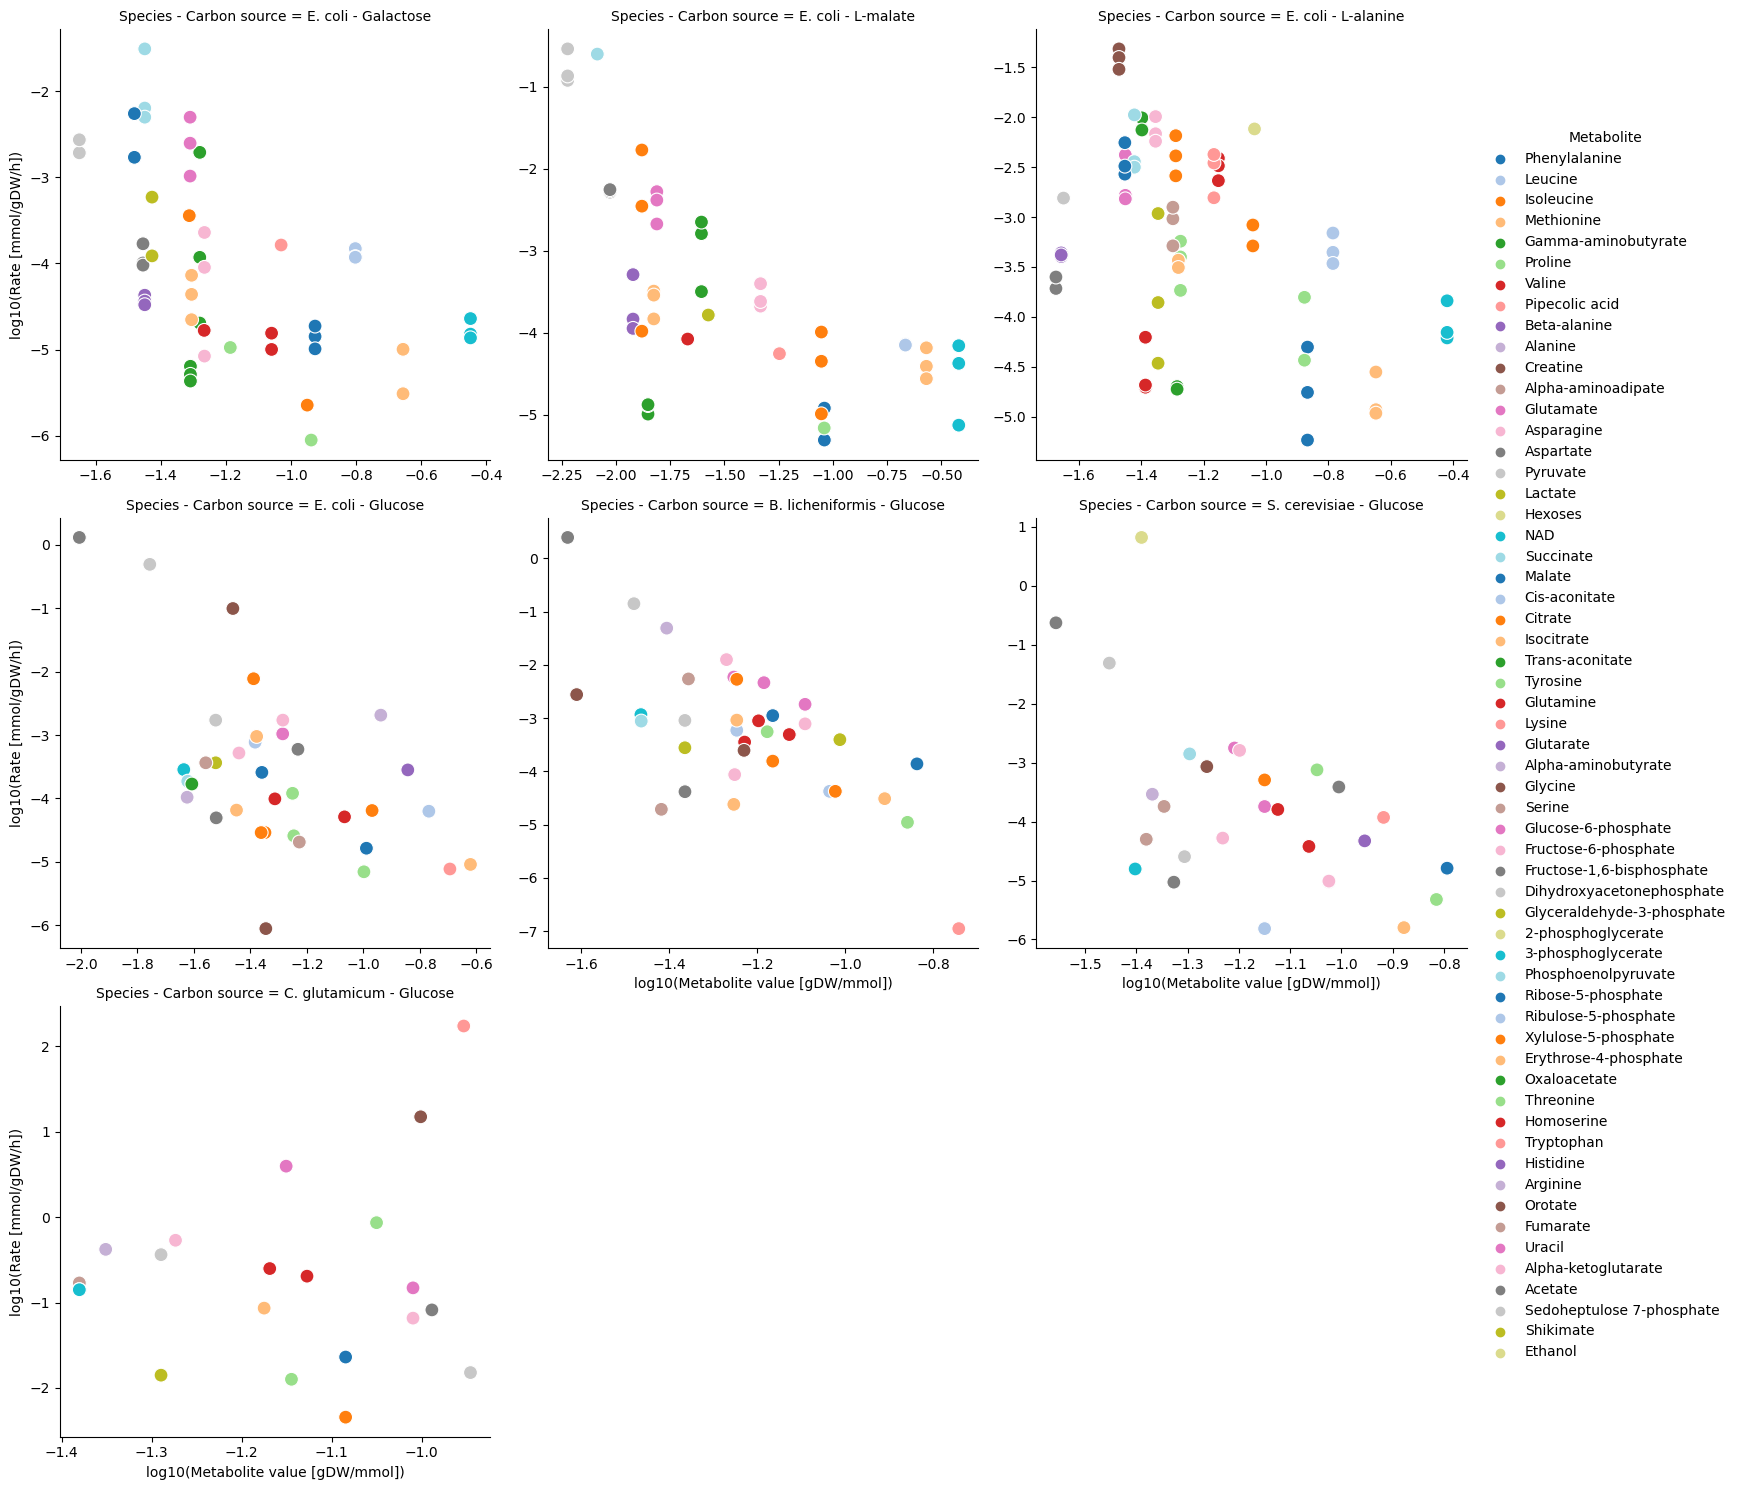

In [28]:
sns.relplot(data = df, x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False}, palette = 'tab20')
plt.show()

In [29]:
df['log10(Intracell. conc. [mM])']=np.log10(df['Intracellular concentration [M]']*1e3)

In [30]:
df.columns

Index(['M', 'Metabolite', 'Carbon source', 'Rate [mmol/gDW/h]', 'Rate var',
       'Metabolite value [gDW/mmol]', 'N carbons', 'Mol weight [g/mol]',
       'Turnover [mmol/gDW/h]', 'BiGG ID', 'Species', 'Dataset', 'Yeast ID',
       'Model metabolite name', 'Mass', 'Metabolite id', 'Charge', 'Phosphate',
       'Topological Polar Surface Area', 'Intracellular concentration [M]',
       'log P', 'Compound class', 'Ref', 'log10(Rate [mmol/gDW/h])',
       'log10(Metabolite value [gDW/mmol])', 'Rate [mmol C/gDW/h]',
       'Rate [g/gDW/h]', 'Metabolite value [gDW/mmol C]',
       'Metabolite value [gDW/g]', 'log10(Rate [mmol C/gDW/h])',
       'log10(Rate [g/gDW/h])', 'log10(Metabolite value [gDW/mmol C])',
       'log10(Metabolite value [gDW/g])', 'log10(Turnover [mmol/gDW/h])',
       'Species - Carbon source', 'log10(Intracell. conc. [mM])'],
      dtype='object')

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


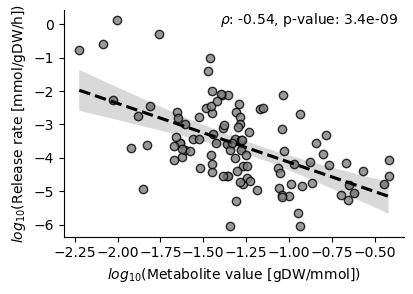

In [31]:
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel(r'$log_{10}$(Metabolite value [gDW/mmol])')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['log10(Metabolite value [gDW/mmol])', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['log10(Metabolite value [gDW/mmol])'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(-1.4, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('value_vs_release.pdf')
plt.savefig('value_vs_release.png', dpi = 400, bbox_inches="tight")
plt.show()

In [32]:
sns.set(font_scale = 1, style = 'ticks')
df_mean = df_no_cg_no_nad.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'Mol weight [g/mol]', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel('Mol weight [g/mol]')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['Mol weight [g/mol]', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['Mol weight [g/mol]'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(150, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('mw_vs_release_no_nad.pdf')
plt.savefig('mw_vs_release_no_nad.png', dpi = 400, bbox_inches="tight")

plt.show()

NameError: name 'df_no_cg_no_nad' is not defined

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


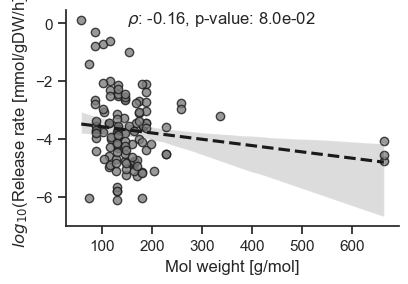

In [33]:
sns.set(font_scale = 1, style = 'ticks')
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'Mol weight [g/mol]', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel('Mol weight [g/mol]')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['Mol weight [g/mol]', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['Mol weight [g/mol]'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(150, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('mw_vs_release.pdf')
plt.savefig('mw_vs_release.png', dpi = 400, bbox_inches="tight")

plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


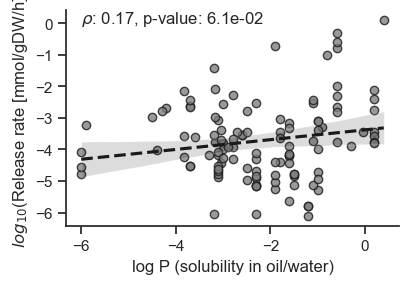

In [34]:
sns.set(font_scale = 1, style = 'ticks')
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'log P', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel('log P (solubility in oil/water)')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['log P', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['log P'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(-6, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('logP_vs_release.pdf')
plt.savefig('logP_vs_release.png', dpi = 400, bbox_inches="tight")

plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


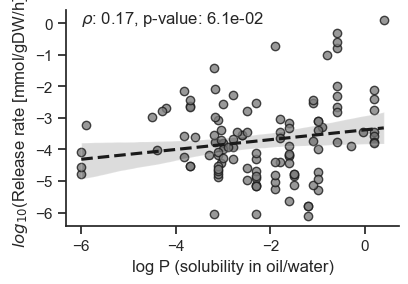

In [35]:
sns.set(font_scale = 1, style = 'ticks')
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'log P', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel('log P (solubility in oil/water)')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['log P', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['log P'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(-6, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('logP_vs_release.pdf')
plt.savefig('logP_vs_release.png', dpi = 400, bbox_inches="tight")

plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


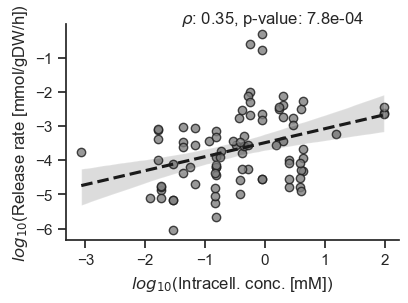

In [36]:
sns.set(font_scale = 1, style = 'ticks')
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
sns.lmplot(data = df_mean.loc[df_mean.Species=='E. coli'], x = 'log10(Intracell. conc. [mM])', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel(r'$log_{10}$(Intracell. conc. [mM])')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['log10(Intracell. conc. [mM])', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['log10(Intracell. conc. [mM])'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(-1.4, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
# sns.relplot(, col = 'Species - Carbon source', col_wrap=3, hue = 'Metabolite', s = 100, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('conc_vs_release.pdf')
plt.savefig('conc_vs_release.png', dpi = 400, bbox_inches="tight")

plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


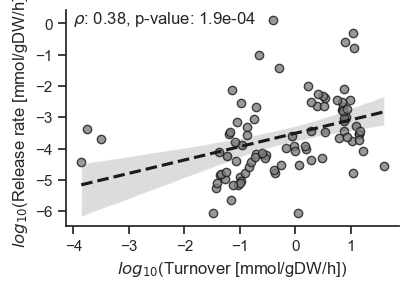

In [37]:
df_mean = df.groupby(['Carbon source', 'Species', 'Metabolite']).mean(numeric_only=True)
df_mean.reset_index(inplace=True)
df_mean.replace([-np.inf, np.inf], np.nan, inplace=True)
notnan_idx = ~df_mean[['log10(Turnover [mmol/gDW/h])', 'log10(Rate [mmol/gDW/h])']].isna().any(axis=1)
s_idx = df_mean.Species=='E. coli'
sns.lmplot(data = df_mean.loc[notnan_idx&s_idx,:], x = 'log10(Turnover [mmol/gDW/h])', y = 'log10(Rate [mmol/gDW/h])', line_kws={'color': 'k', 'ls': '--'}, scatter_kws={'color': 'gray', 'edgecolor': 'k', 'alpha':0.8}, aspect=1.4, height=3)
plt.xlabel(r'$log_{10}$(Turnover [mmol/gDW/h])')
plt.ylabel(r'$log_{10}$(Release rate [mmol/gDW/h])')

corr_data = df_mean.loc[df_mean.Species=='E. coli',['log10(Turnover [mmol/gDW/h])', 'log10(Rate [mmol/gDW/h])']]
corr_data = corr_data.loc[~corr_data.isna().any(axis = 1)]

pcorr, ppval = st.pearsonr(corr_data['log10(Turnover [mmol/gDW/h])'], corr_data['log10(Rate [mmol/gDW/h])'])
plt.text(-4, 0, r'$\rho$: {0:.2f}, p-value: {1:.1e}'.format(pcorr, ppval))
plt.savefig('turnover_vs_release.pdf')
plt.savefig('turnover_vs_release.png', dpi = 400, bbox_inches="tight")

plt.show()

In [38]:
df_no_cg = df.loc[df.Species!='C. glutamicum', :]
df_no_cg_no_nad = df_no_cg.loc[df_no_cg.Metabolite !='NAD', :]

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will 

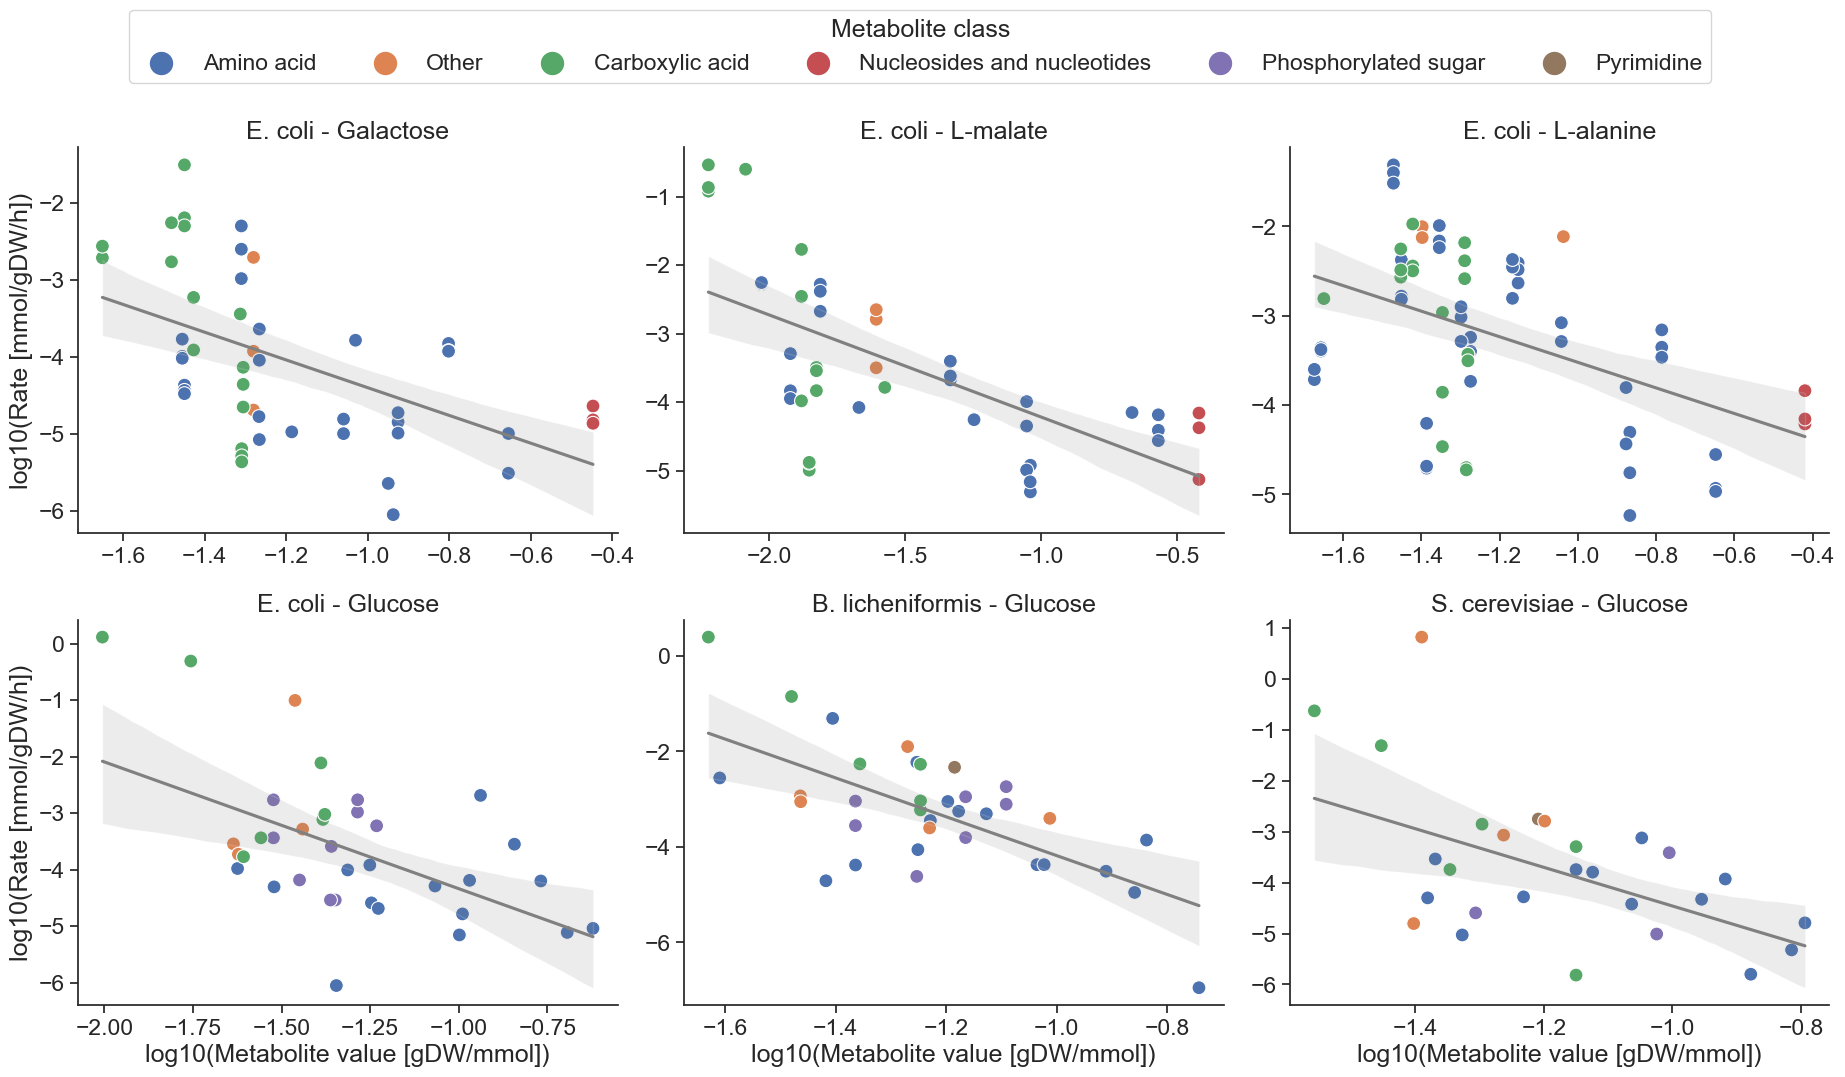

In [39]:
sns.set(font_scale = 1.5, style = 'ticks')
p = sns.relplot(data = df_no_cg, x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, hue = 'Compound class', s = 100, facet_kws={'sharex': False, 'sharey': False})
p.map(sns.regplot, 'log10(Metabolite value [gDW/mmol])', 'log10(Rate [mmol/gDW/h])', scatter = False, color = 'gray')
p.set_titles(col_template="{col_name}", row_template="{row_name}")
sns.move_legend(
    p, "lower center",
    bbox_to_anchor=(.5, 1), ncol=6, title='Metabolite class', frameon=True,
)
for lh in p.legend.legend_handles: 
    lh._sizes = [250] 
plt.tight_layout()
# sns.regplot(data = df, x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, scatter=False, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('value_vs_rate.png', dpi = 400, bbox_inches="tight")
plt.savefig('value_vs_rate.pdf', bbox_inches="tight")
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


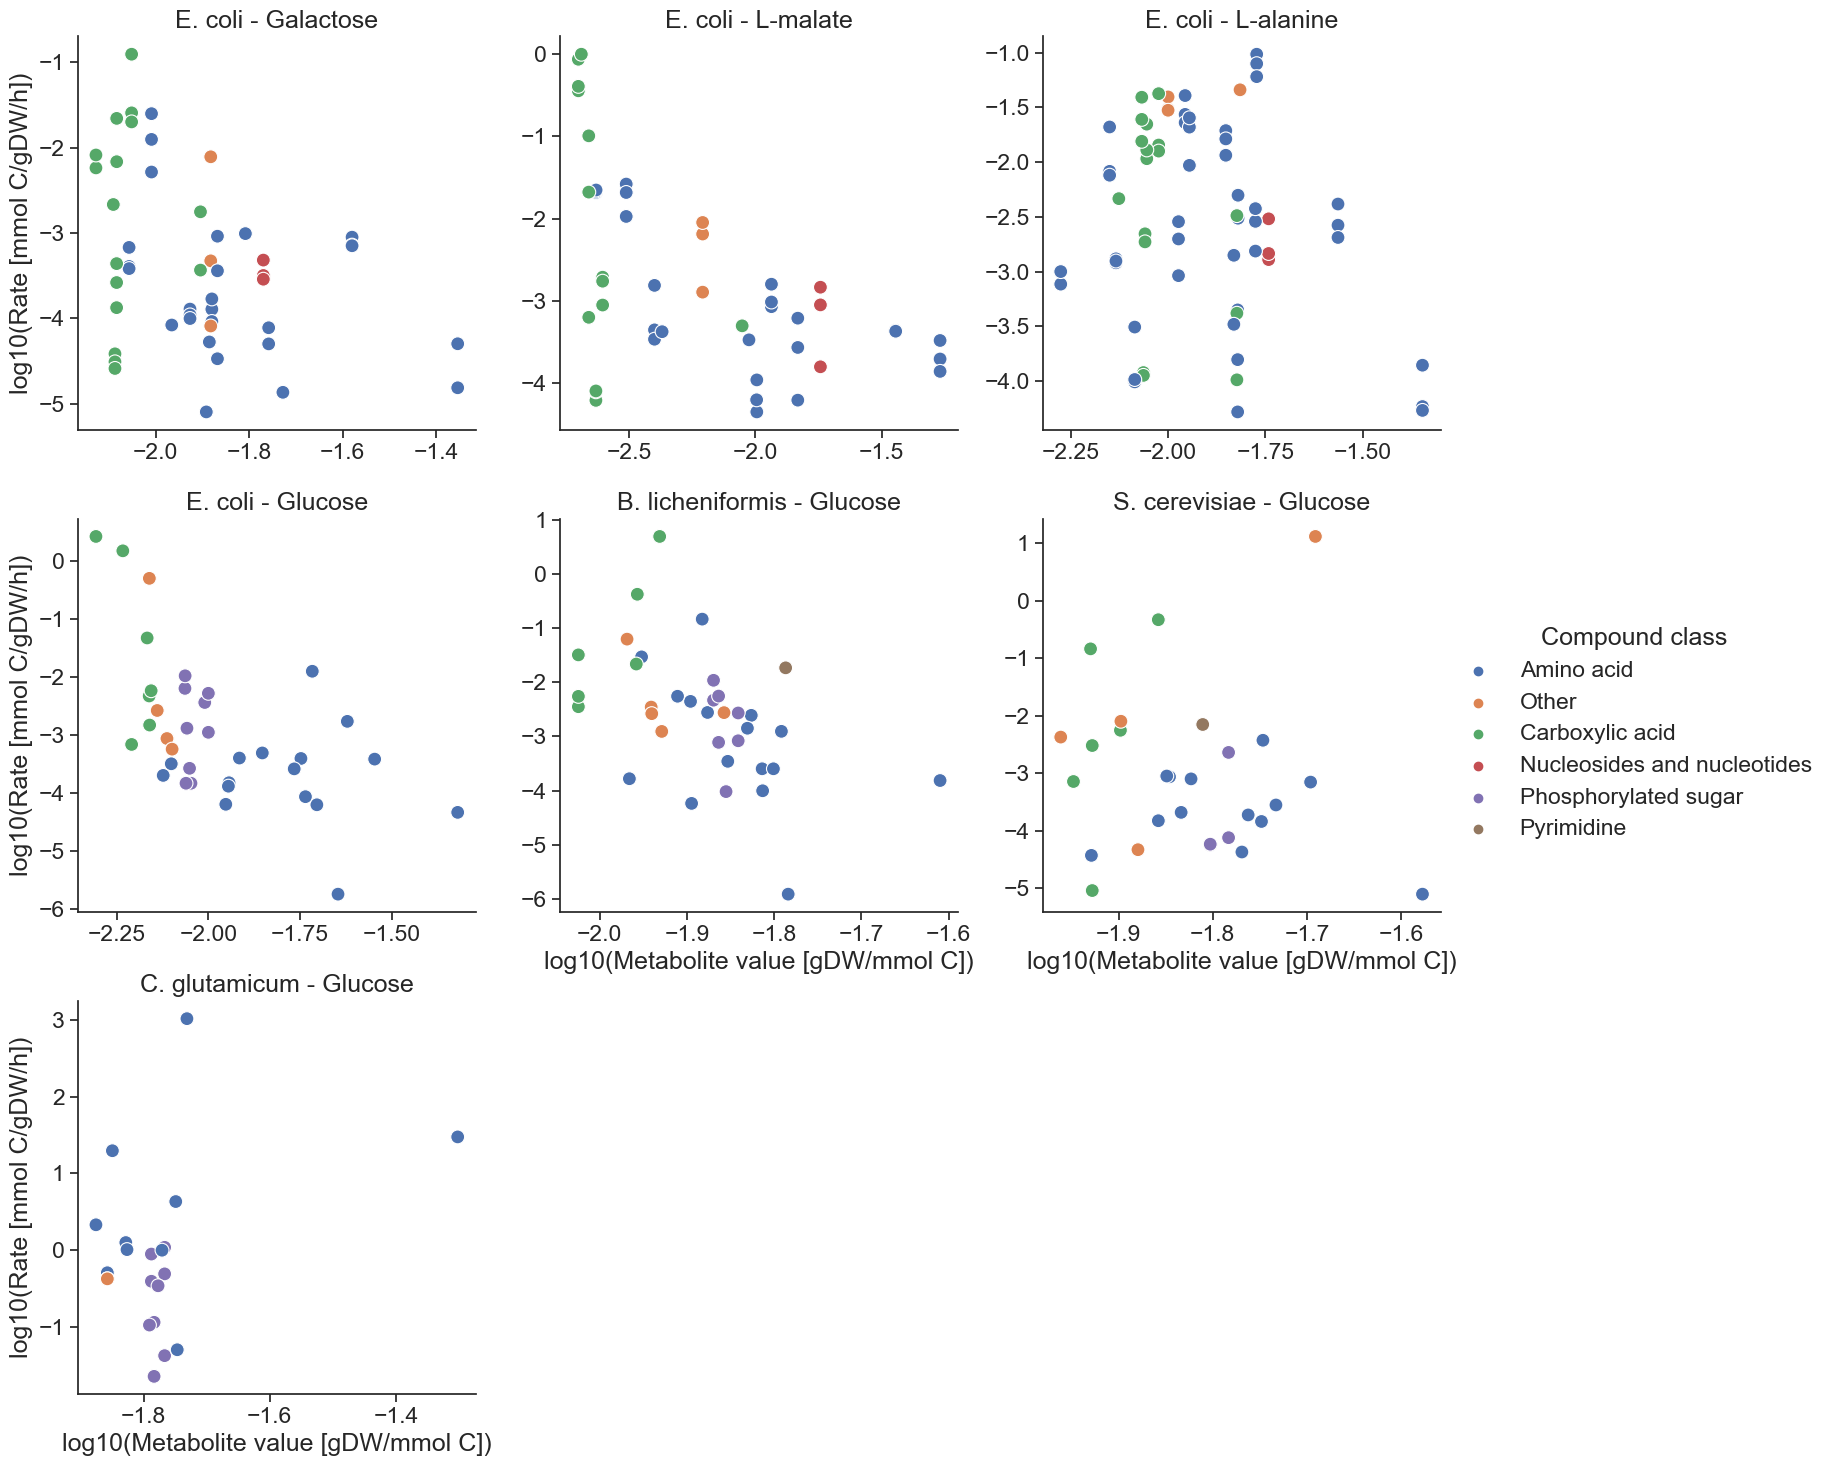

In [40]:
sns.set(font_scale = 1.5, style = 'ticks')
p = sns.relplot(data = df, x = 'log10(Metabolite value [gDW/mmol C])', y = 'log10(Rate [mmol C/gDW/h])', col = 'Species - Carbon source', col_wrap=3, hue = 'Compound class', s = 100, facet_kws={'sharex': False, 'sharey': False})
p.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.show()

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will 

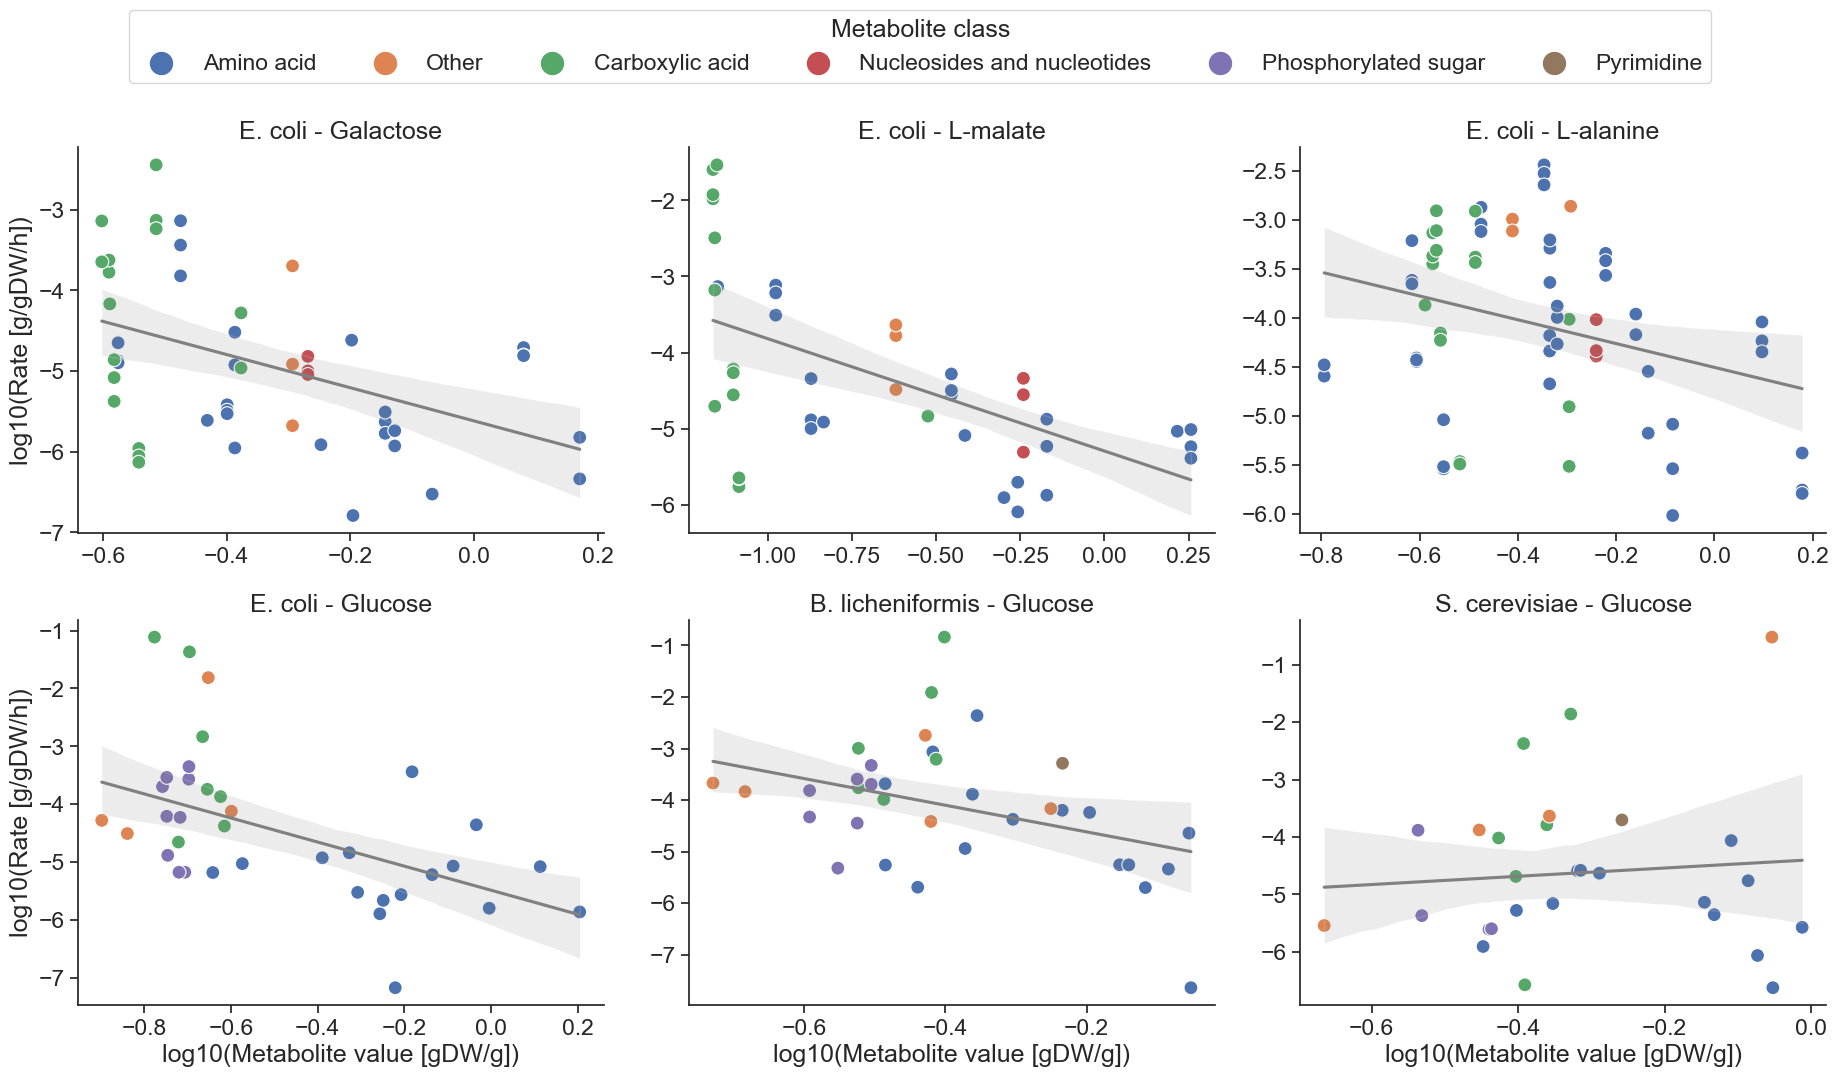

In [41]:
p = sns.relplot(data = df_no_cg, x = 'log10(Metabolite value [gDW/g])', y = 'log10(Rate [g/gDW/h])', col = 'Species - Carbon source', col_wrap=3, hue = 'Compound class', s = 100, facet_kws={'sharex': False, 'sharey': False})
p.map(sns.regplot, 'log10(Metabolite value [gDW/g])', 'log10(Rate [g/gDW/h])', scatter = False, color = 'gray')
p.set_titles(col_template="{col_name}", row_template="{row_name}")
sns.move_legend(
    p, "lower center",
    bbox_to_anchor=(.5, 1), ncol=6, title='Metabolite class', frameon=True,
)
for lh in p.legend.legend_handles: 
    lh._sizes = [250] 
plt.tight_layout()
# sns.regplot(data = df, x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, scatter=False, facet_kws={'sharex': False, 'sharey': False})
plt.savefig('value_vs_rate_g.png', dpi = 400, bbox_inches="tight")
plt.savefig('value_vs_rate_g.pdf', bbox_inches="tight")
plt.show()

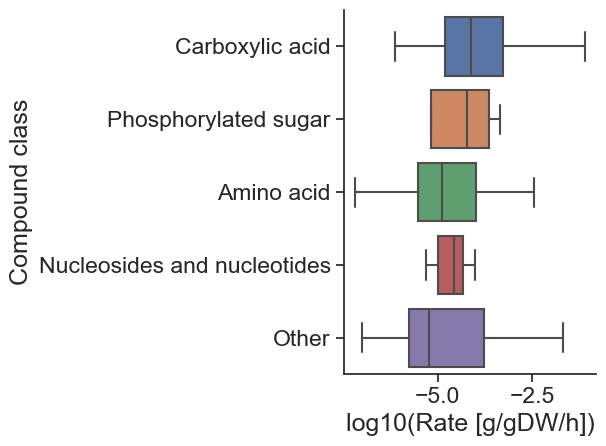

In [42]:
sns.boxplot(data = df.loc[df.Species=='E. coli'], y = 'Compound class', x = 'log10(Rate [g/gDW/h])', order=['Carboxylic acid', 'Phosphorylated sugar', 'Amino acid', 'Nucleosides and nucleotides', 'Other'])
sns.despine()
plt.tight_layout()
plt.savefig('boxplot_rates.png', dpi = 400)
plt.show()

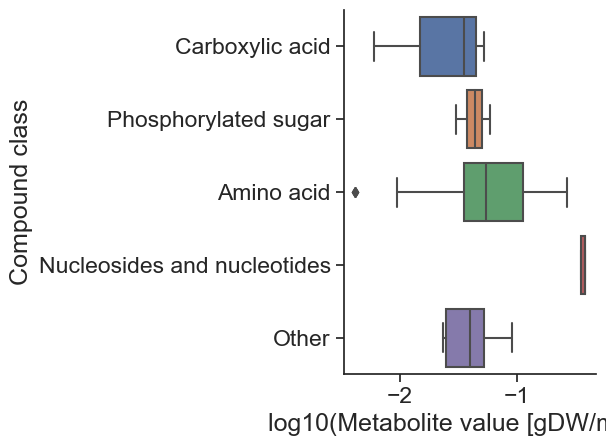

In [43]:
sns.boxplot(data = df.loc[df.Species=='E. coli'], y = 'Compound class', x = 'log10(Metabolite value [gDW/mmol])', order=['Carboxylic acid', 'Phosphorylated sugar', 'Amino acid', 'Nucleosides and nucleotides', 'Other'])
sns.despine()
plt.tight_layout()
plt.savefig('boxplot_values.png', dpi = 400)
plt.show()

In [44]:
sns.lmplot(data = df, x = 'log10(Metabolite value [gDW/mmol])', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, facet_kws={'sharex': False, 'sharey': False})

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [45]:
sns.lmplot(data = df, x = 'log10(Metabolite value [gDW/mmol C])', y = 'log10(Rate [mmol C/gDW/h])', col = 'Species - Carbon source', col_wrap=3, facet_kws={'sharex': False, 'sharey': False})

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


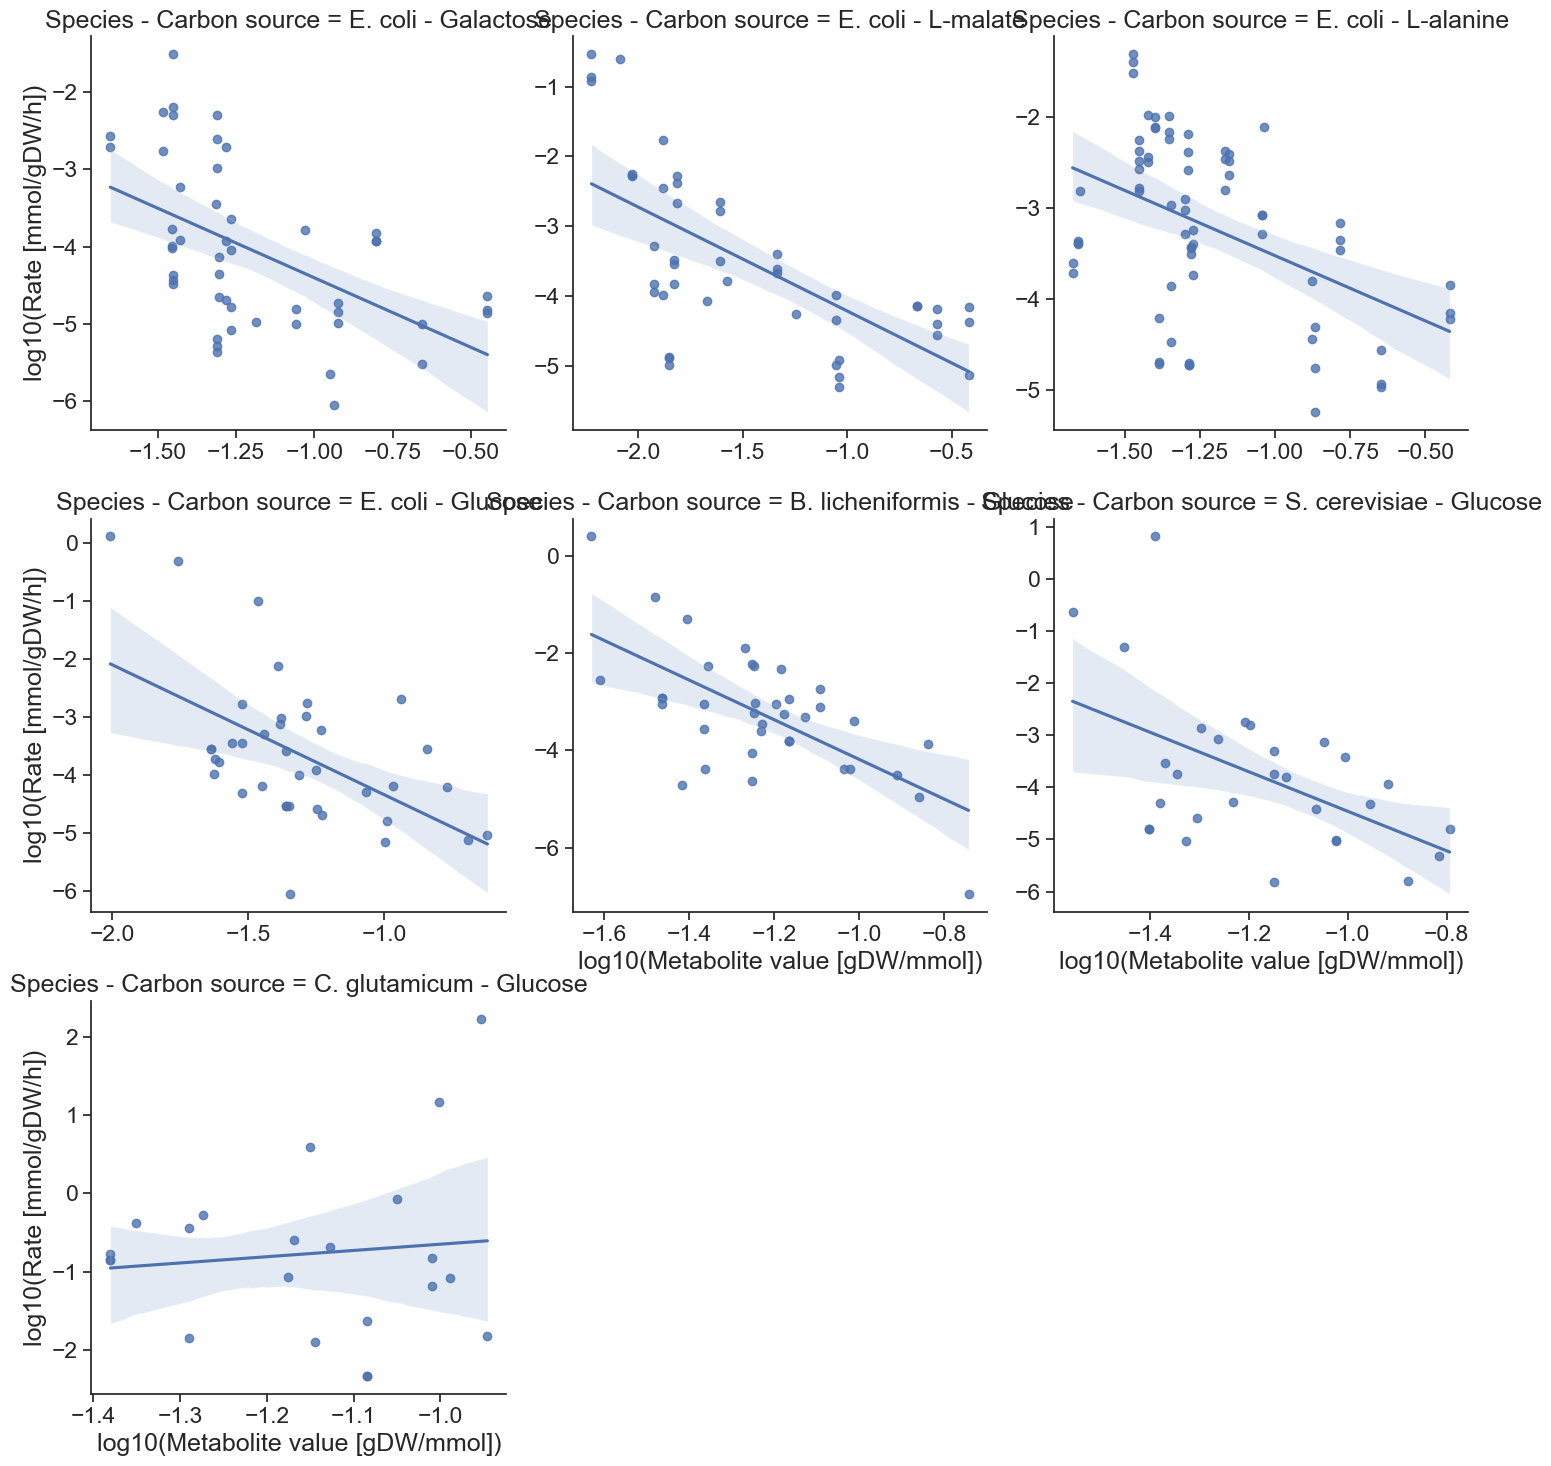

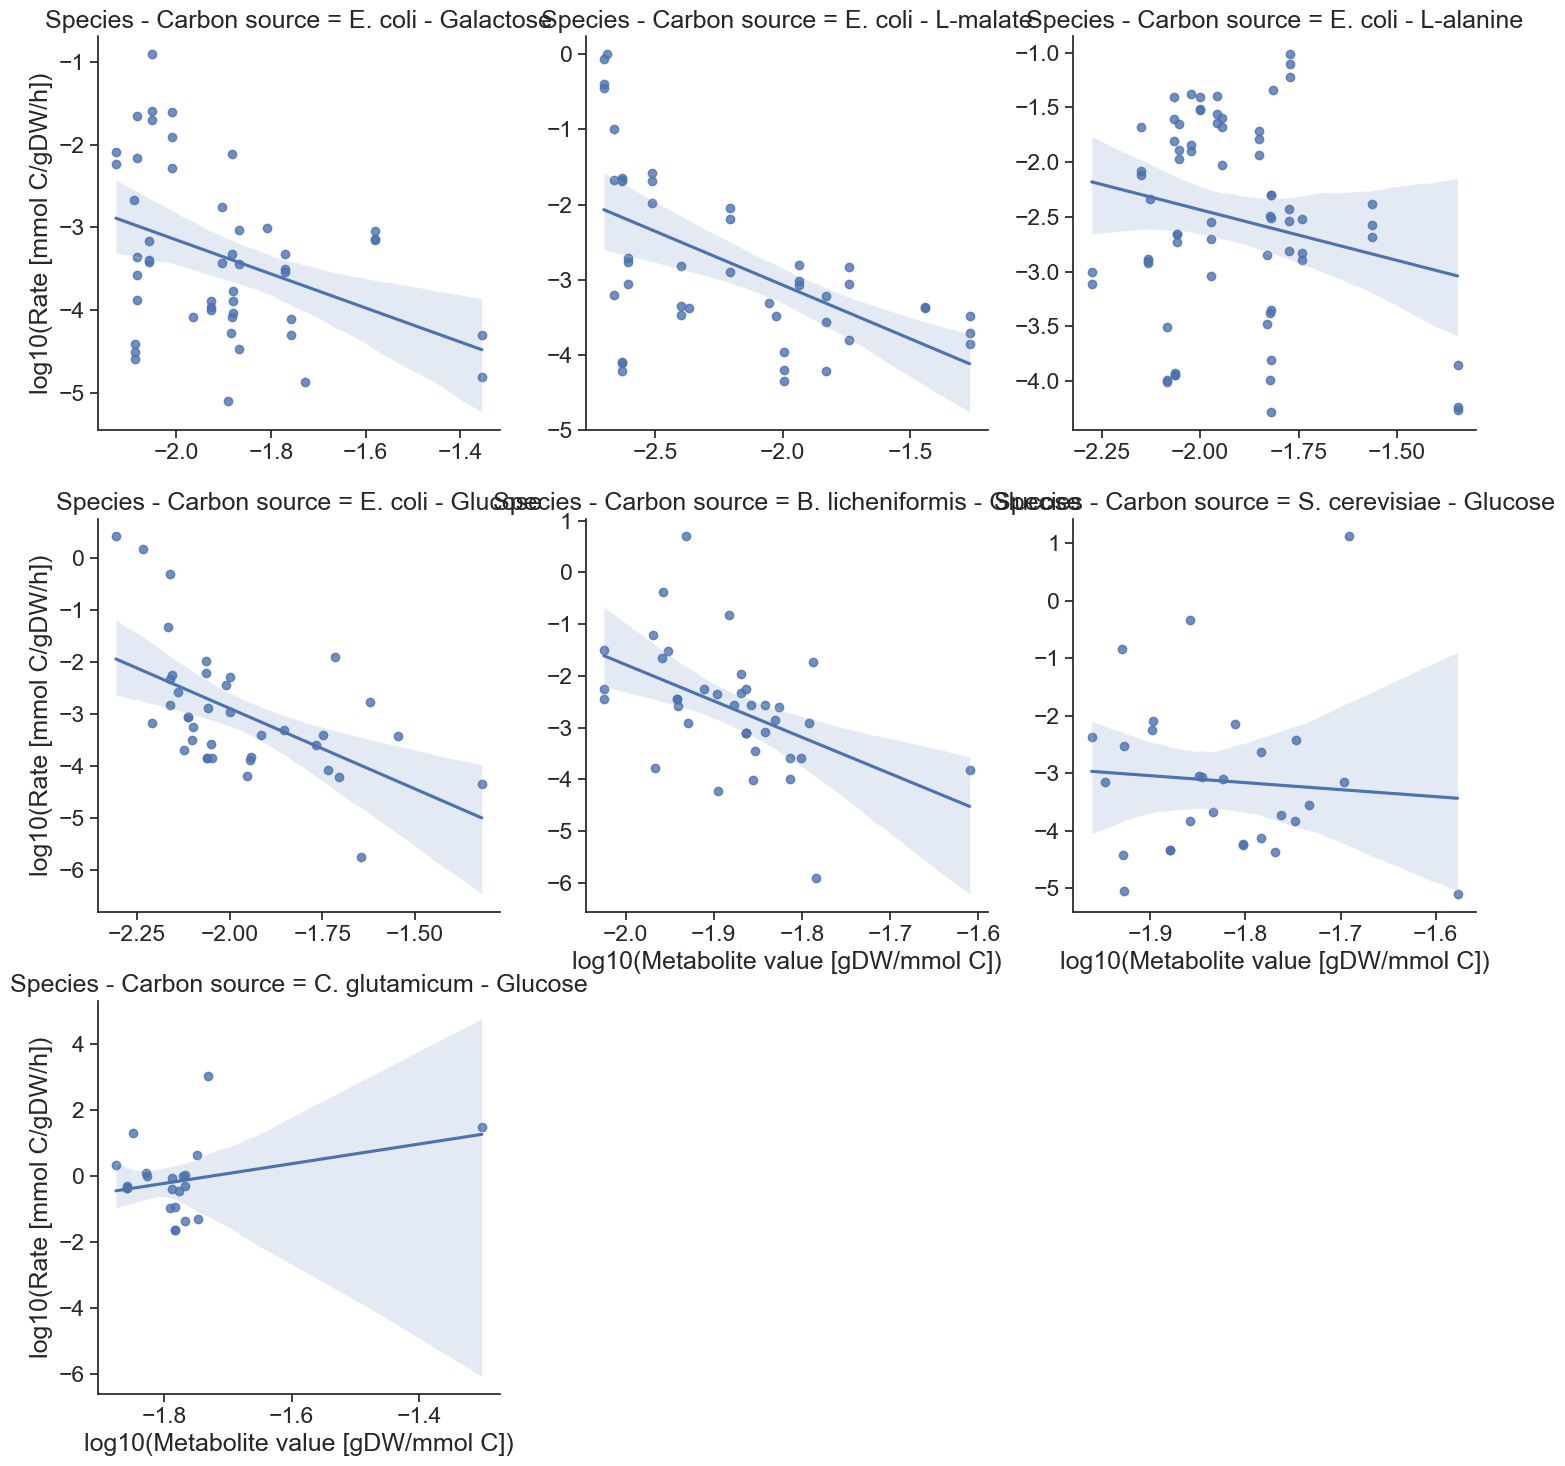

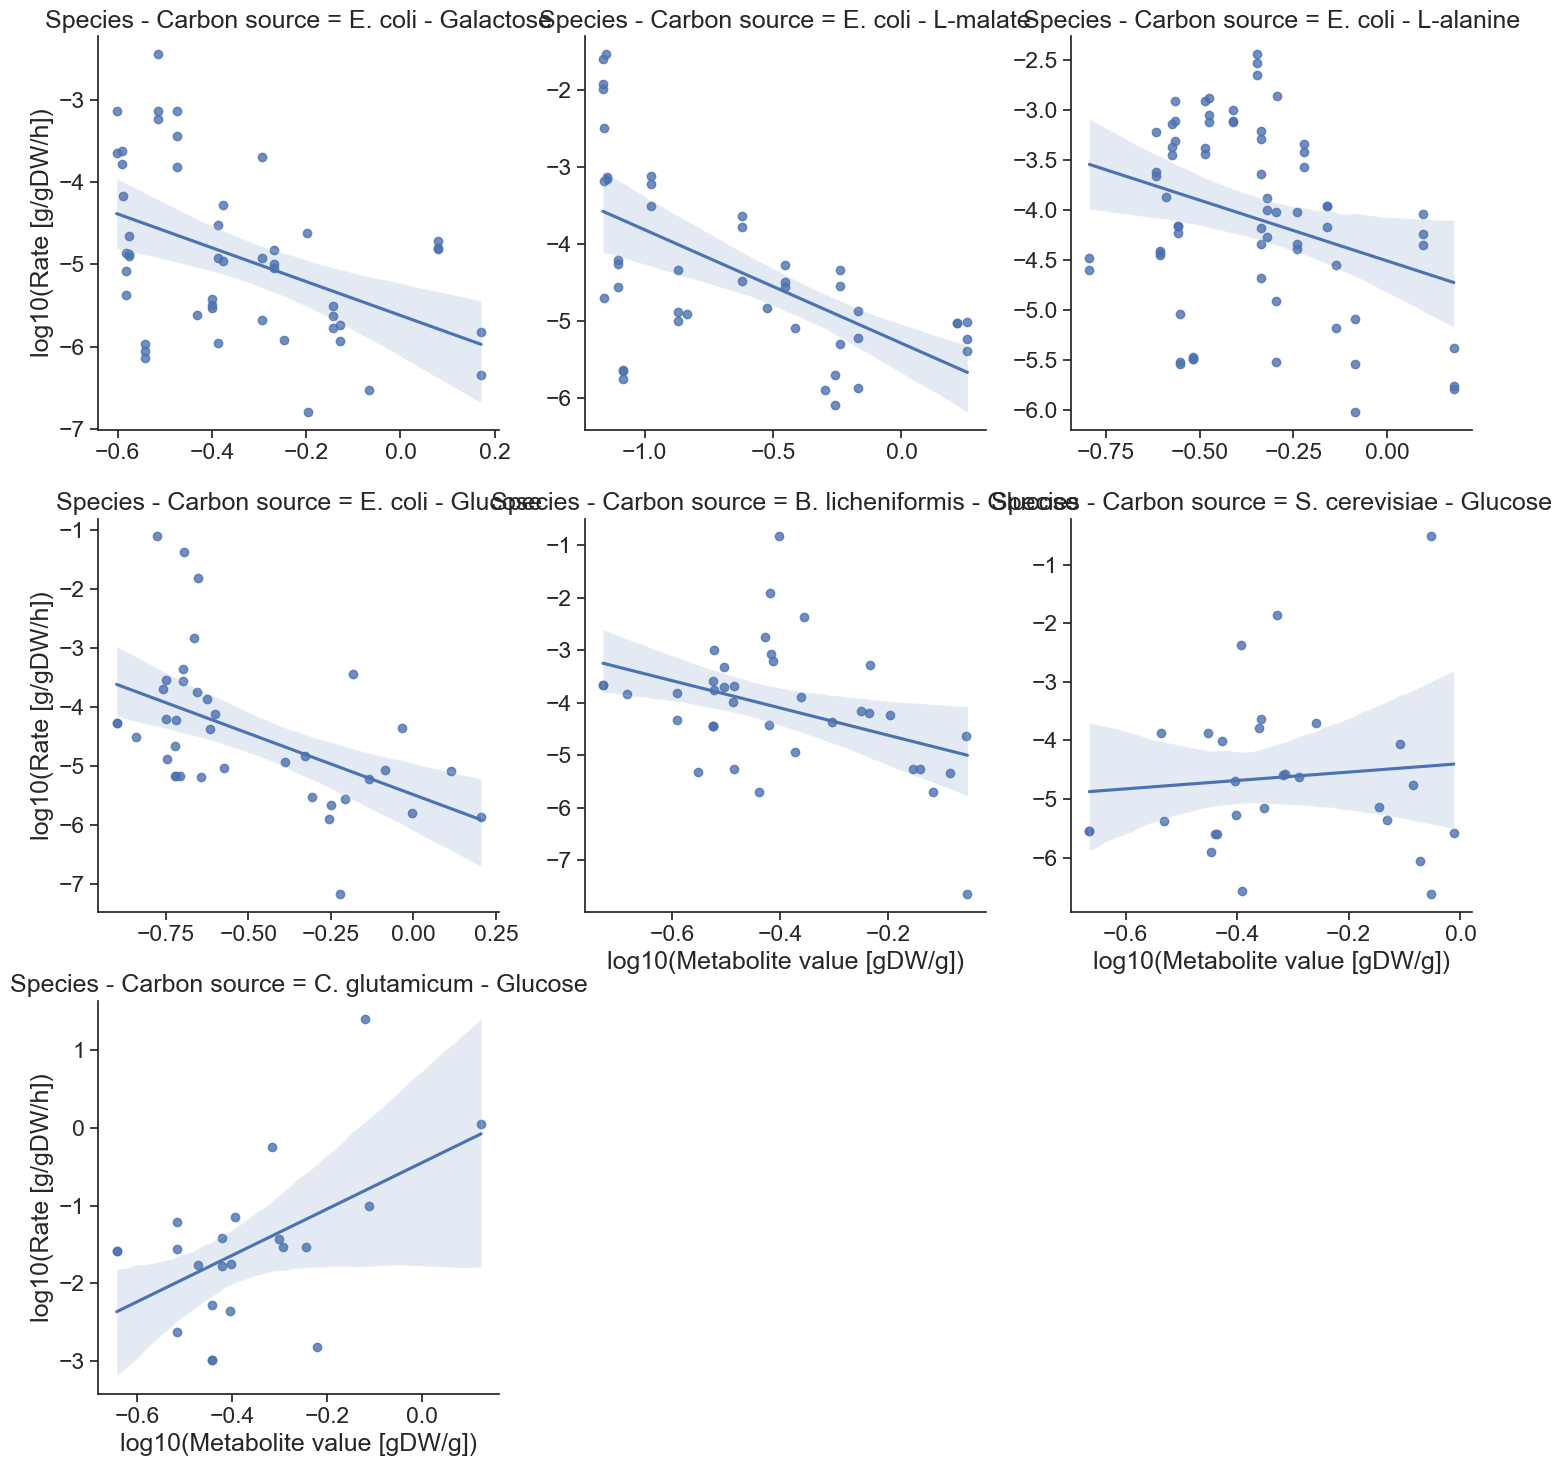

In [46]:
sns.lmplot(data = df, x = 'log10(Metabolite value [gDW/g])', y = 'log10(Rate [g/gDW/h])', col = 'Species - Carbon source', col_wrap=3, facet_kws={'sharex': False, 'sharey': False})
plt.show()

In [47]:
'Metabolite', 'Carbon source',
xvarsL = ['Mol weight [g/mol]', 'Topological Polar Surface Area', 'log10(Intracell. conc. [mM])', 'log P', 'log10(Rate [mmol/gDW/h])','Charge','Phosphate',
       'log10(Metabolite value [gDW/mmol])','log10(Turnover [mmol/gDW/h])']
xvarsS = ['Mol weight [g/mol]', 'Polar surface area', 'log10(Intracell. conc. [mM])', 'log P',
       'log10(Metabolite value [gDW/mmol])', 'log10(Rate [mmol/gDW/h])']

In [48]:
df['Polar surface area'] = df['Topological Polar Surface Area']

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


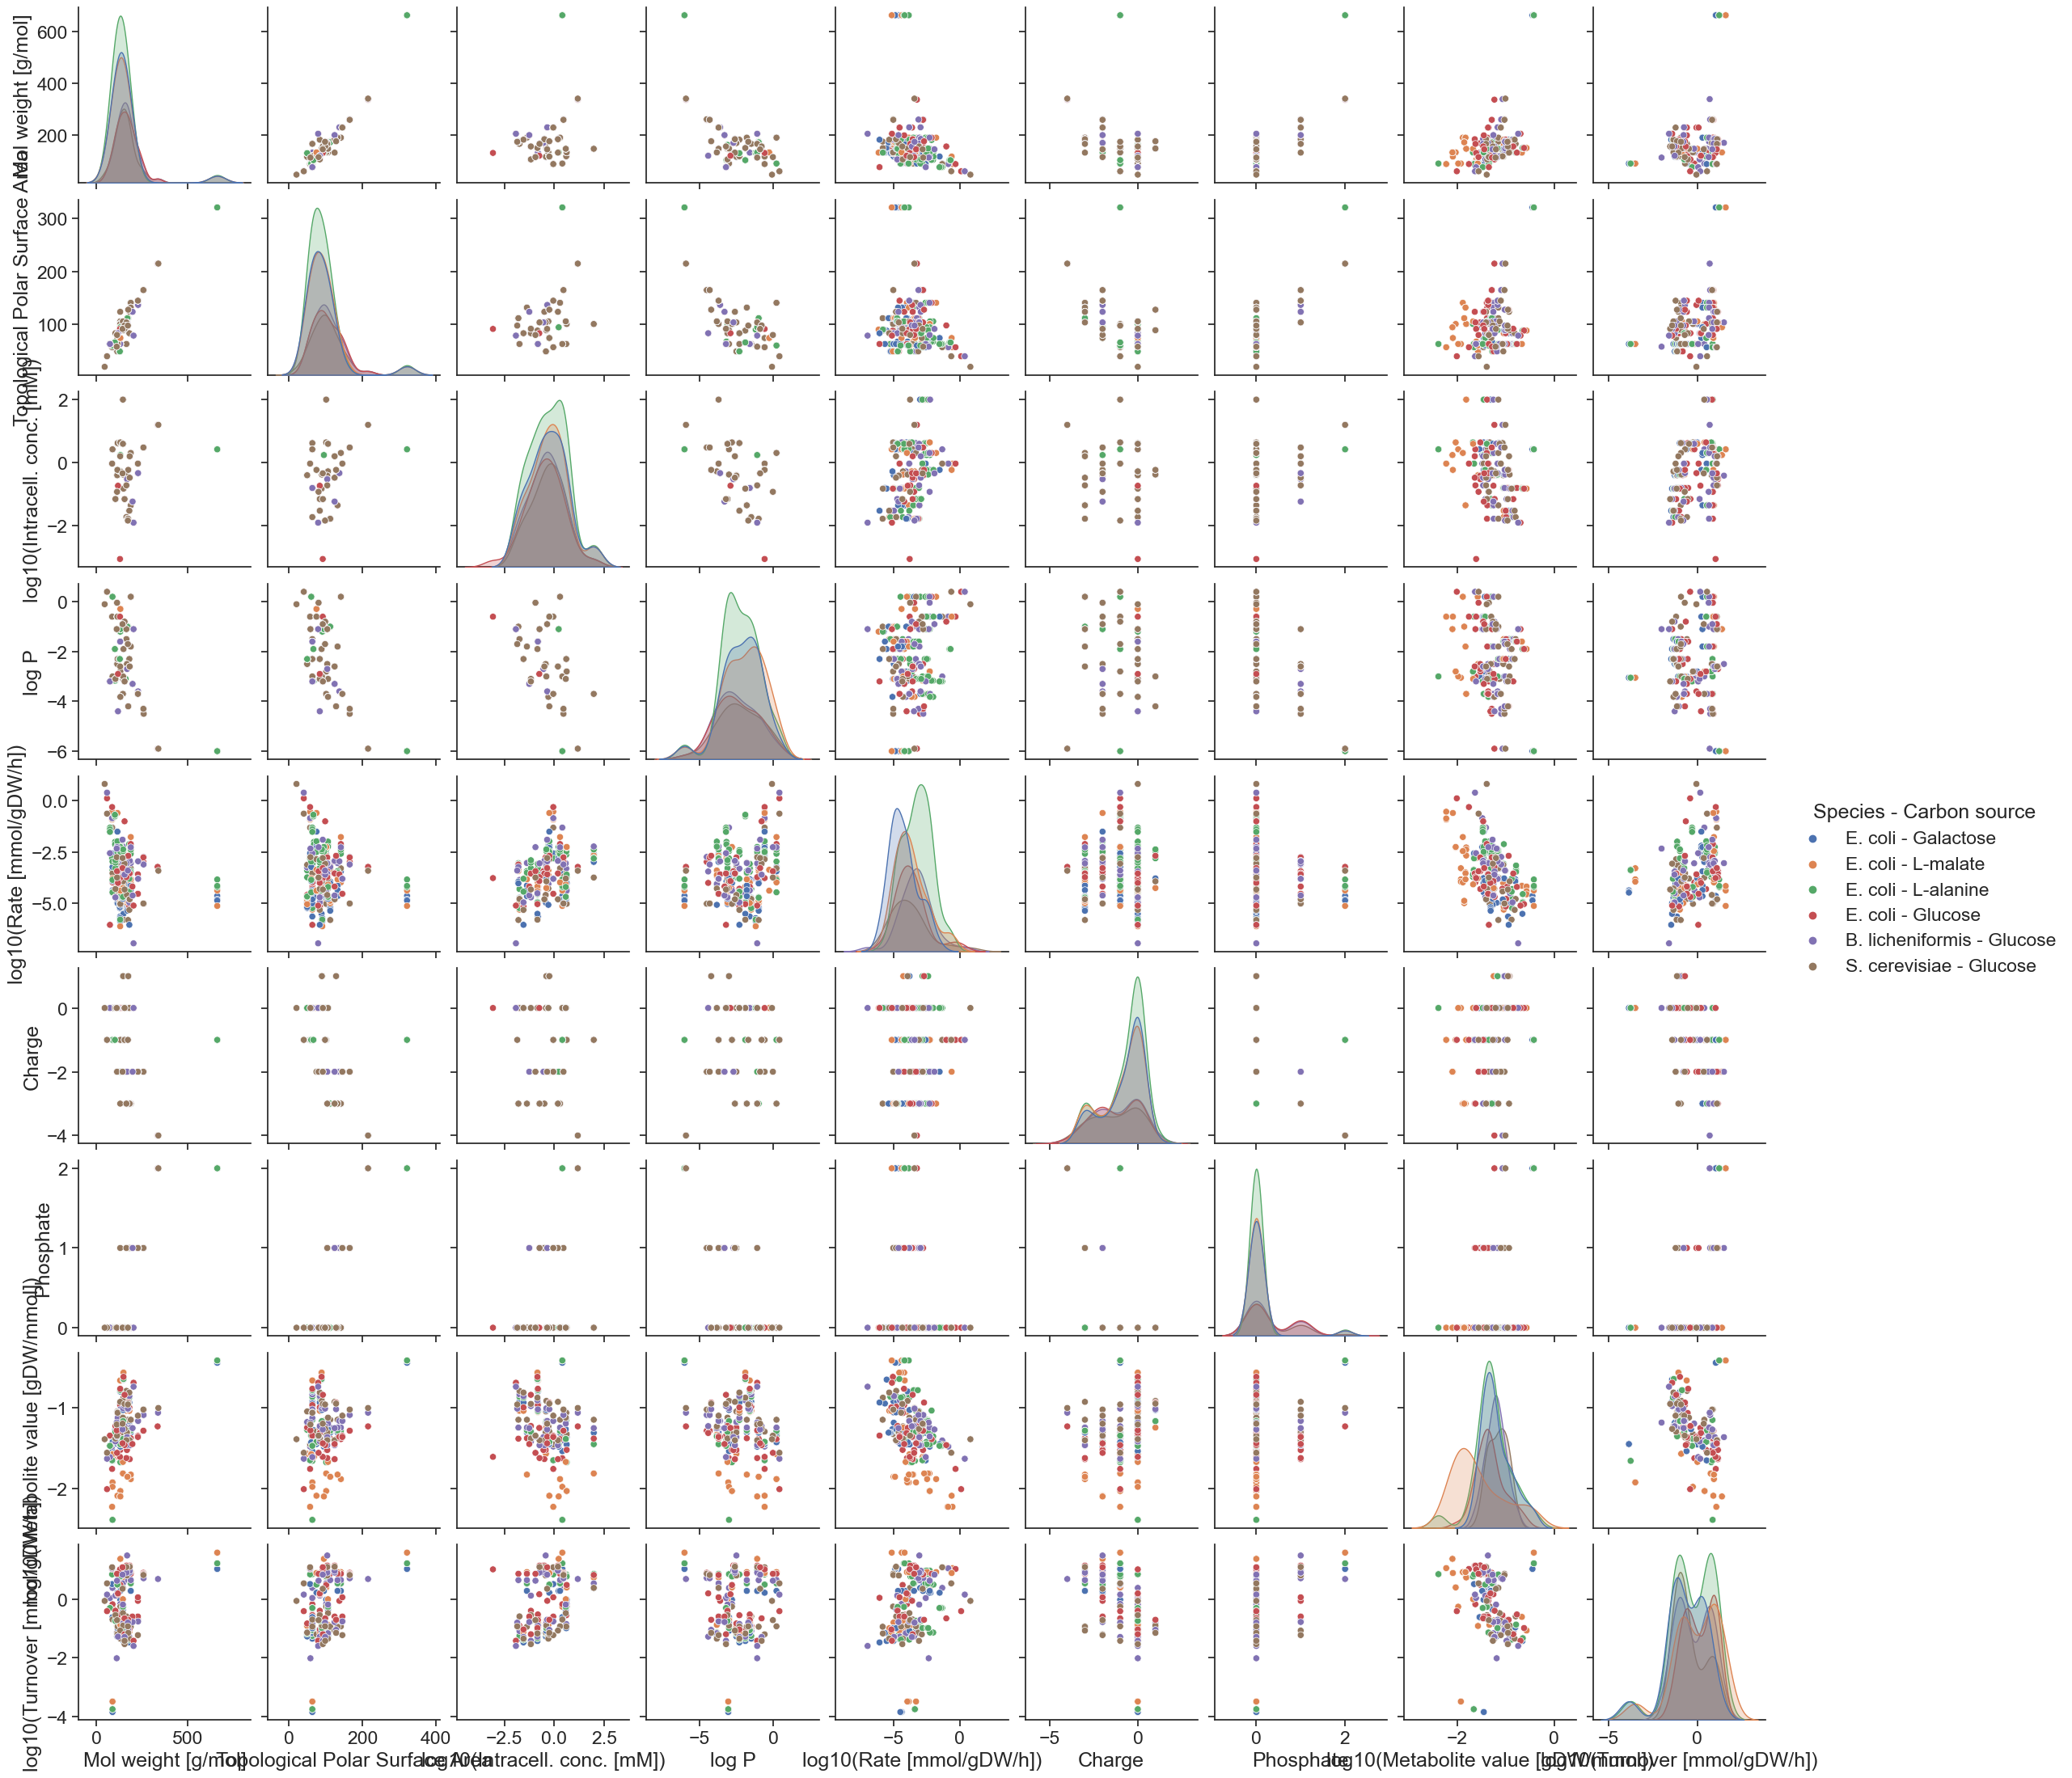

In [49]:
sns.pairplot(df_no_cg, x_vars=xvarsL, y_vars=xvarsL, hue = 'Species - Carbon source')
plt.show()

In [50]:
sns.pairplot(df_no_cg, x_vars=xvarsS, y_vars=xvarsS, hue = 'Species - Carbon source')
plt.show()

KeyError: 'Polar surface area'

In [ ]:
sns.pairplot(df_no_cg_no_nad, x_vars=xvarsS, y_vars=xvarsS, hue = 'Species - Carbon source')

In [ ]:
sns.pairplot(df_no_cg, x_vars=xvarsS, y_vars=xvarsS, 
            kind="reg")

In [ ]:
sns.pairplot(df_no_cg_no_nad, x_vars=xvarsS, y_vars=xvarsS, 
            kind="reg")

In [ ]:
sns.set(font_scale = 0.8,style = 'ticks')
sns.pairplot(df_no_cg_no_nad, x_vars=xvarsS[-3:-1], 
            kind="reg", y_vars = ['log10(Rate [mmol/gDW/h])'], palette='tab20', 
             plot_kws={'scatter_kws':{'s':10}, 'color': '#1f77b4'})
plt.savefig('other_factors2.png', dpi = 400)
plt.show()

In [ ]:
sns.lmplot(df_no_cg_no_nad, x = 'Mol weight [g/mol]', y = 'log10(Rate [mmol/gDW/h])', col = 'Species - Carbon source', col_wrap=3, facet_kws={'sharex': False, 'sharey': False})

In [ ]:
sns.lmplot(df_no_cg, y = 'log10(Intracellular concentration [mM])', x = 'log10(Metabolite value [gDW/mmol])', col = 'Species - Carbon source', col_wrap=3, facet_kws={'sharex': False, 'sharey': False})

# Rate distribution

In [56]:
from scipy import stats as st

In [57]:
fit = st.fit(st.norm, [x for x in df_no_cg['log10(Rate [mmol/gDW/h])'] if np.isfinite(x)],
             bounds = [[-5, -2], [0, 3]])
print(fit.params)

FitParams(loc=-3.6264605134556858, scale=1.2409463164970953)


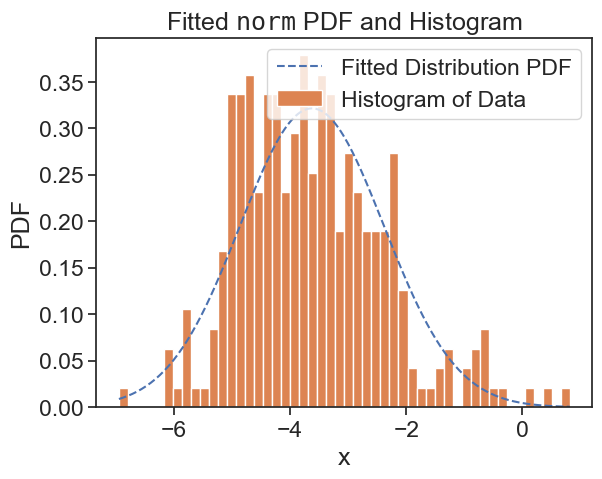

In [62]:
fit.plot()
plt.show()

In [59]:
df_no_cg['log10(Rate [mmol/gDW/h])'].to_csv('log10_rates.csv')
df_no_cg['Rate [mmol/gDW/h]'].to_csv('D_rates.csv')

In [63]:
x = np.linspace(-8, 1, 100)
dist = fit.pxf(x, loc = fit.params[0], scale = fit.params[1])

In [64]:
fit.params

FitParams(loc=-3.6264605134556858, scale=1.2409463164970953)

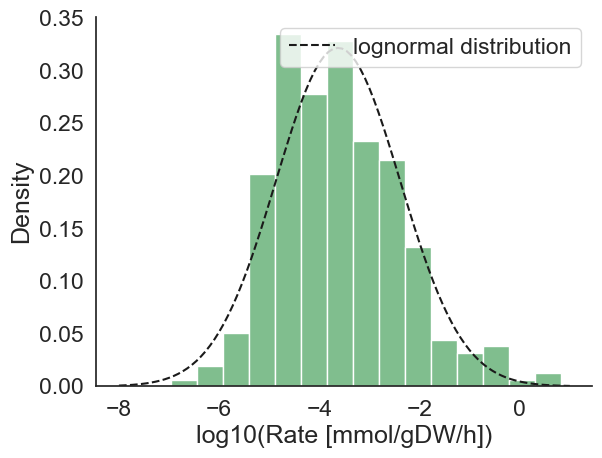

In [65]:
sns.set_style('white')
ax = sns.histplot(df_no_cg['log10(Rate [mmol/gDW/h])'], stat='density', palette='tab10', color='C2')
sns.lineplot(x = x, y = dist, ax = ax, color = 'k', ls = '--', label = 'lognormal distribution')
sns.move_legend(ax, loc = 1)
sns.despine()
plt.show()

In [344]:
fit.plot(df_no_cg['log10(Rate [mmol/gDW/h])'])
plt.show()

Signature: fit.plot(ax=None, *, plot_type='hist')
Docstring:
Visually compare the data against the fitted distribution.

Available only if ``matplotlib`` is installed.

Parameters
----------
ax : matplotlib.axes.Axes
    Axes object to draw the plot onto, otherwise uses the current Axes.
plot_type : {"hist", "qq", "pp", "cdf"}
    Type of plot to draw. Options include:

    - "hist": Superposes the PDF/PMF of the fitted distribution
      over a normalized histogram of the data.
    - "qq": Scatter plot of theoretical quantiles against the
      empirical quantiles. Specifically, the x-coordinates are the
      values of the fitted distribution PPF evaluated at the
      percentiles ``(np.arange(1, n) - 0.5)/n``, where ``n`` is the
      number of data points, and the y-coordinates are the sorted
      data points.
    - "pp": Scatter plot of theoretical percentiles against the
      observed percentiles. Specifically, the x-coordinates are the
      percentiles ``(np.arange(1, n) - 0.

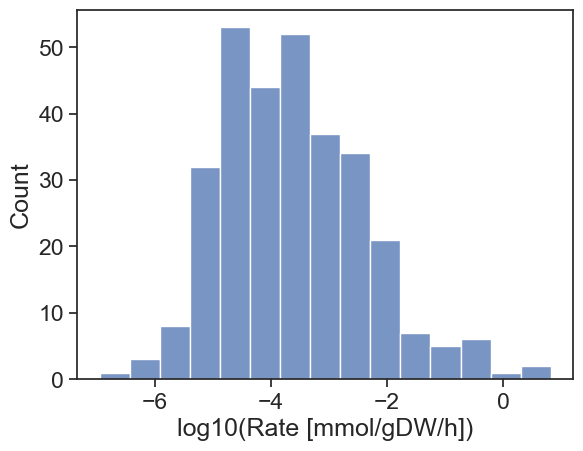

In [321]:
sns.histplot(df_no_cg['log10(Rate [mmol/gDW/h])'], color='C0')
plt.show()

# Linear model

In [102]:
import statsmodels.formula.api as sm

In [60]:
idx = df_no_cg.Species == 'B. licheniformis'

In [97]:
df_ecoli = df.loc[df.Species == 'E. coli']

In [64]:
np.isnan(df_no_cg[key]).sum()

42

In [127]:
xvarsL = ['Mol weight [g/mol]', 'Topological Polar Surface Area', 'log10(Intracell. conc. [mM])', 'log P', 'log10(Rate [mmol/gDW/h])','Charge','Phosphate',
       'log10(Metabolite value [gDW/mmol])','log10(Turnover [mmol/gDW/h])', 'Compound class']

In [158]:
var_explained = {}
for key in xvarsL:
    print(key)
    if key == 'log10(Rate [mmol/gDW/h])':
        continue
    lindf = pd.DataFrame()
    lindf['Y'] = df_ecoli['log10(Rate [mmol/gDW/h])']
    lindf['A'] = df_ecoli[key]
    print(lindf['A'])
    lindf.replace([np.inf, -np.inf], np.nan, inplace=True)
    lindf.dropna(inplace=True)
    # print(np.isnan(lindf['A']).sum())
    res = sm.ols(formula="Y ~ A", data=lindf).fit()
    res.summary()
    print(key, res.rsquared)
    var_explained[key] = res.rsquared_adj

Mol weight [g/mol]
0      165.18914
1      165.18914
2      165.18914
3      165.18914
4      165.18914
         ...    
359    155.08832
362    114.05628
365    112.08676
368    144.08226
371     59.04402
Name: A, Length: 273, dtype: float64
Mol weight [g/mol] 0.043747797433916435
Topological Polar Surface Area
0      63.3
1      63.3
2      63.3
3      63.3
4      63.3
       ... 
359    98.3
362    80.3
365    58.2
368    91.7
371    40.1
Name: A, Length: 273, dtype: float64
Topological Polar Surface Area 0.012318905273198011
log10(Intracell. conc. [mM])
0     -1.739929
1     -1.739929
2     -1.739929
3     -1.739929
4     -1.739929
         ...   
359         NaN
362   -0.939302
365         NaN
368   -0.353596
371         NaN
Name: A, Length: 273, dtype: float64
log10(Intracell. conc. [mM]) 0.12323567611968278
log P
0     -1.500
1     -1.500
2     -1.500
3     -1.500
4     -1.500
       ...  
359   -0.800
362   -0.041
365   -1.100
368   -0.900
371    0.400
Name: A, Length: 273, dty

In [190]:
lindf = pd.DataFrame()
lindf['Y'] = df_ecoli['log10(Rate [mmol/gDW/h])']
lindf['A'] = df_ecoli['log10(Intracell. conc. [mM])']
lindf['B'] = df_ecoli['log10(Metabolite value [gDW/mmol])']
lindf['C'] = df_ecoli['Charge']
lindf['D'] = df_ecoli['Mol weight [g/mol]']
lindf['G'] = df_ecoli['Compound class']
lindf['E'] = df_ecoli['log P']
lindf['F'] = df_ecoli['log10(Turnover [mmol/gDW/h])']
lindf.replace([np.inf, -np.inf], np.nan, inplace=True)
lindf.dropna(inplace=True)
# lindf['F'] = df_no_cg['Mol weight [g/mol]']
# lindf['G'] = df_no_cg['Topological Polar Surface Area']
res = sm.ols(formula="Y ~ A + B + C + G", data=lindf).fit()
res.summary()
var_explained['Met. value + Int. conc + charge + compound class'] = res.rsquared_adj
print(var_explained)

{'Mol weight [g/mol]': 0.039712978013806466, 'Topological Polar Surface Area': 0.008133815888762386, 'log10(Intracell. conc. [mM])': 0.1180168408584904, 'log P': 0.014429257558727926, 'Charge': 0.03207771476753196, 'Phosphate': 0.008216054166763409, 'log10(Metabolite value [gDW/mmol])': 0.2603006824488413, 'log10(Turnover [mmol/gDW/h])': 0.11171507773087208, 'Compound class': 0.06611525877798452, 'Met. value + Int. conc + charge + compound class': 0.5587334039120769}


In [198]:
s = res.summary2()
print(s)
s.tables[1].to_csv('linear_model.csv')

                         Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:          0.559   
Dependent Variable:       Y                     AIC:                     358.8158
Date:                     2024-04-22 21:36      BIC:                     383.3166
No. Observations:         158                   Log-Likelihood:          -171.41 
Df Model:                 7                     F-statistic:             29.40   
Df Residuals:             150                   Prob (F-statistic):      2.98e-25
R-squared:                0.578                 Scale:                   0.53999 
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                        -4.7304   0.2908 -16.2645 0.0000 -5.3051 -4.1557
G[T.Carboxylic acid]              1.8811 

In [206]:
np.sqrt(res.mse_resid)

0.7348429916172776

In [207]:
np.std(res.resid)

0.7159977253577231

In [311]:
res.resid

0     -0.142795
1     -0.286635
2     -0.021915
3     -0.322957
4     -0.712939
         ...   
350   -0.102847
352    0.956148
355    0.819311
362   -0.674078
368    0.032671
Length: 158, dtype: float64

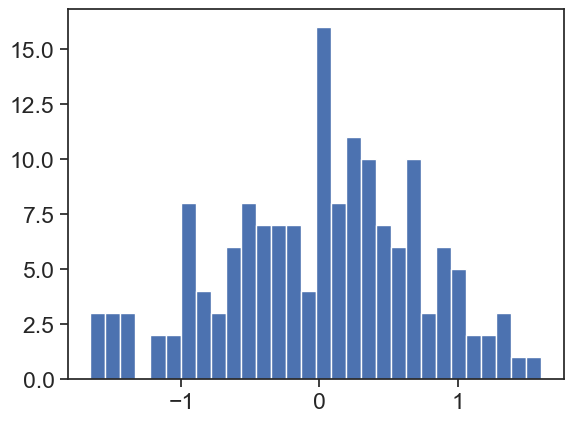

In [312]:
plt.hist(res.resid, bins=30)
plt.show()

In [168]:
order = [k for k, v in sorted(var_explained.items(), key=lambda item: item[1])]

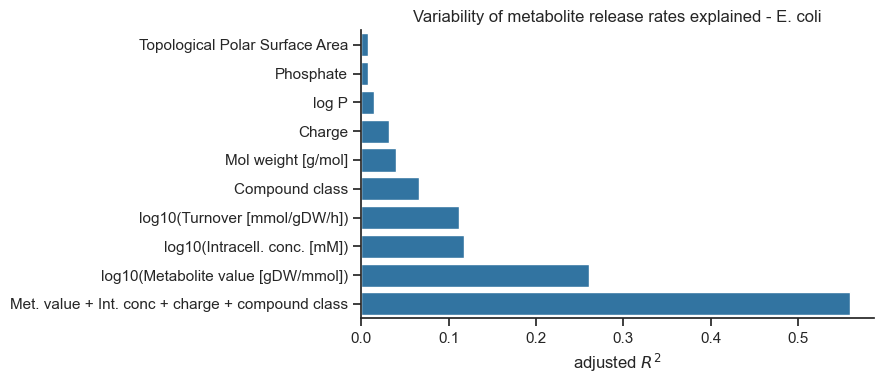

In [183]:
sns.set(font_scale = 1, style = 'ticks')
keys = list(var_explained.keys())
# get values in the same order as keys, and parse percentage values
fig, ax = plt.subplots(1,1, figsize = (9, 4))
vals = list(var_explained.values())
sns.barplot(y=keys, x=vals, color = '#1f77b4', order = order, ax = ax)
plt.xlabel(r'adjusted $R^2$')
sns.despine()
plt.title('Variability of metabolite release rates explained - E. coli')
plt.tight_layout()
plt.savefig('barplot_ecoli.png', dpi = 400)

plt.show()

In [117]:
xvarsL = ['Mol weight [g/mol]', 'Topological Polar Surface Area', 'log10(Intracell. conc. [mM])', 'log P', 'log10(Rate [mmol/gDW/h])','Charge','Phosphate',
       'log10(Metabolite value [gDW/mmol])','log10(Turnover [mmol/gDW/h])']

In [48]:
df.columns

Index(['M', 'Metabolite', 'Carbon source', 'Rate [mmol/gDW/h]', 'Rate var',
       'Metabolite value [gDW/mmol]', 'N carbons', 'Mol weight [g/mol]',
       'Turnover [mmol/gDW/h]', 'BiGG ID', 'Species', 'Dataset', 'Yeast ID',
       'Model metabolite name', 'Mass', 'Metabolite id', 'Charge', 'Phosphate',
       'Topological Polar Surface Area', 'Intracellular concentration',
       'log P', 'Compound class', 'log10(Rate [mmol/gDW/h])',
       'log10(Metabolite value [gDW/mmol])', 'Rate [mmol C/gDW/h]',
       'Rate [g/gDW/h]', 'Metabolite value [gDW/mmol C]',
       'Metabolite value [gDW/g]', 'log10(Rate [mmol C/gDW/h])',
       'log10(Rate [g/gDW/h])', 'log10(Metabolite value [gDW/mmol C])',
       'log10(Metabolite value [gDW/g])', 'Species - Carbon source',
       'log10(Intracellular concentration [mM])'],
      dtype='object')

# Fix mapping

In [118]:
minfo3 = pd.read_excel('../data/met_info_3.xlsx')
minfo2 = pd.read_csv('../data/met_info_curated_211.csv', encoding = "ISO-8859-1", index_col = 0)

In [121]:
dic = minfo2.set_index('Metabolite name').to_dict(orient = 'index')

In [129]:
minfom = pd.merge(left = minfo3, right = minfo2, left_on = 'Metabolite', right_on = 'Metabolite name', how = 'left')

In [130]:
minfom.to_csv('../data/met_info_3.csv')